# House Price Prediction with Linear Regression

This notebook explores a simple linear regression model to predict house prices based on numerical features. The project focuses on understanding the full machine learning workflow, from data inspection to model evaluation.

**Goal:** Predict house prices using linear and multiple linear regression  
**Tools:** Python, pandas, scikit-learn, matplotlib


### Import Necessary Tools & Libraries

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Load the Dataset

In [75]:
df = pd.read_csv("Housing_Price_Data.csv")

### Inspect Data

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [77]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Clean & Select Relevant Data

In [78]:
df = df[['price','area']]

### Split Train/Test data

In [79]:
X = df[['area']]   
y = df['price']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Create The Model

In [80]:
model = LinearRegression()

### Train the Model (Fit it)

In [81]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Make Predictions

In [82]:
y_pred = model.predict(X_test)

### Visualize actual data and regression line

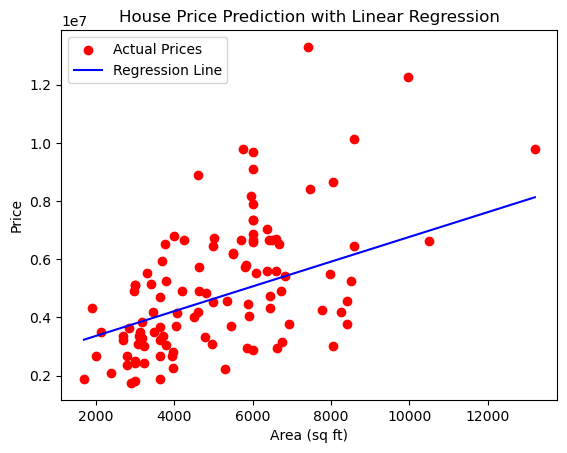

In [83]:


# Scatter plot of actual data (test set)
plt.scatter(X_test, y_test, color='red', label='Actual Prices')

# Sort X values for a clean regression line
X_line = X_test.sort_values(by='area')
y_line = model.predict(X_line)

# Plot regression line
plt.plot(X_line, y_line, color='blue', label='Regression Line')

# Labels & title
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('House Price Prediction with Linear Regression')
plt.legend()

plt.show()


### Create a Predictions Dataframe

In [84]:
predictions = pd.DataFrame({
    'area': X_test['area'],
    'actual_price': y_test,
    'predicted_price': y_pred
})

### Save to CSV

In [85]:
predictions.to_csv('prediction.csv', index=False)

### Evaluate the Model

In [86]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 3675286604768.185
R² Score: 0.27287851871974644


## Model Evaluation

### Mean Squared Error (MSE)
The Mean Squared Error measures the average squared difference between the actual house prices and the model’s predicted prices.  
Because house prices are large numerical values, the MSE is expected to be relatively high in magnitude. Lower values indicate better predictive accuracy.

### R² Score
The R² score for this model is **0.27**, meaning that approximately **27% of the variance in house prices** is explained by house area alone.

This indicates a **weak to moderate linear relationship** between area and price. While house size contributes to price, a large portion of the variation is influenced by other factors such as location, number of bedrooms, condition, and amenities.

Because this model uses only a **single feature**, the R² score serves as a **baseline**. Including additional features in a multiple linear regression model would likely improve performance.
